#RNN (LSTM) to classify MNIST digits dataset

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM,Dense, Input, Flatten


In [2]:
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


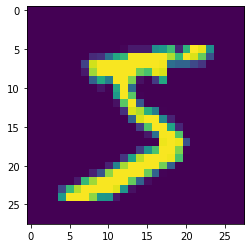

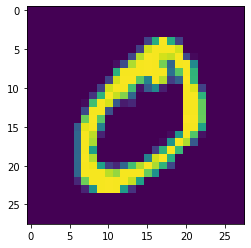

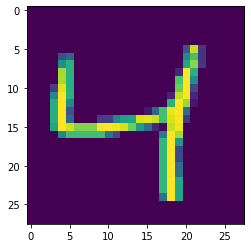

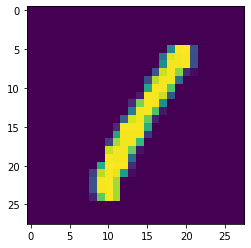

In [5]:
for i in range(0,4):
  plt.imshow(x_train[i])
  plt.show()


In [6]:
i = Input(shape=(28, 28))

x = LSTM(64, activation='relu')(i)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

In [7]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 42s 20ms/step - loss: 1.9911 - accuracy: 0.2980 - val_loss: 0.7571 - val_accuracy: 0.7566
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4710 - accuracy: 0.8455 - val_loss: 0.3495 - val_accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2240 - accuracy: 0.9304 - val_loss: 0.1540 - val_accuracy: 0.9509
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1578 - accuracy: 0.9507 - val_loss: 0.1124 - val_accuracy: 0.9650
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1260 - accuracy: 0.9608 - val_loss: 0.1313 - val_accuracy: 0.9586
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1055 - accuracy: 0.9682 - val_loss: 0.0965 - val_accuracy: 0.9696
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0923 - accuracy: 0.9711 - val_loss: 0.0766 -

[0.06337675452232361, 0.9797999858856201]

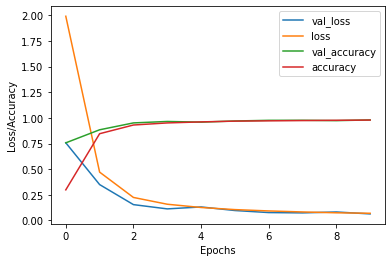

In [12]:
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.plot(r.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0634 - accuracy: 0.9798


[0.06337675452232361, 0.9797999858856201]

The accuracy of 97.98% on the given test dataset.